In [5]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

from qiskit.quantum_info import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-07-03 07:00:11,541: Credentials are already in use. The existing account in the session will be replaced.


In [49]:
# Charlie handles setting up the entangled state
qc_charlie = QuantumCircuit(2,2)

qc_charlie.h(1)
qc_charlie.cx(1,0)


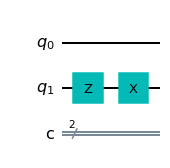

In [58]:
qc_alice = QuantumCircuit(2,2)
message = '11'

# Alice Encodes the Message in the entangled state:
if message[0] == '1':
    qc_alice.z(1)
if message[1] == '1':
    qc_alice.x(1)

qc_alice.draw()

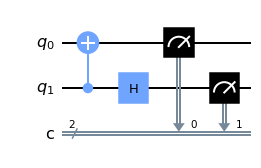

In [52]:
qc_bob = QuantumCircuit(2,2)

# Bob needs to detangle the entangled state
qc_bob.cx(1,0)
qc_bob.h(1)

# Bob measures the qubits to get the message:
qc_bob.measure([0,1], [0,1])

qc_bob.draw()


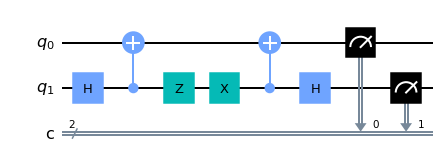

In [59]:
qc_complete = qc_charlie.compose(qc_alice.compose(qc_bob))

qc_complete.draw()

In [60]:


backend = Aer.get_backend('aer_simulator')

backend.run(qc_complete).result().get_counts()

{'11': 1024}